# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

%matplotlib inline

In [2]:
## Load iris dataset
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

# Agglomerative hierarchical clustering

In [4]:
k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('HC_k=%d' % k)
    
    # Call model
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    
    # Get cluster IDs 
    result = model.fit_predict(X)
    
    models.append(model)
    results.append(result)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric='euclidean'))

    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(Y, result))

In [5]:
silhouette_scores = pd.Series(silhouette_scores, index = names)
mutual_scores = pd.Series(mutual_scores, index = names)

In [6]:
silhouette_scores

HC_k=2    0.686393
HC_k=3    0.554097
HC_k=4    0.488740
HC_k=5    0.484155
HC_k=6    0.361885
HC_k=7    0.344854
HC_k=8    0.346241
HC_k=9    0.333139
dtype: float64

In [7]:
mutual_scores

HC_k=2    0.576771
HC_k=3    0.757803
HC_k=4    0.636404
HC_k=5    0.571033
HC_k=6    0.492795
HC_k=7    0.472473
HC_k=8    0.452586
HC_k=9    0.432991
dtype: float64

- scikit-learn 내에 있는 AgglomerativeClustering은 dendrogram을 지원하지 않습니다.
- scipy를 활용하여 그림을 그려봅시다.

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [10]:
Z.shape

(149, 4)

In [11]:
Z[0:5]

array([[9.00e+00, 3.40e+01, 0.00e+00, 2.00e+00],
       [3.70e+01, 1.50e+02, 0.00e+00, 3.00e+00],
       [1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00]])

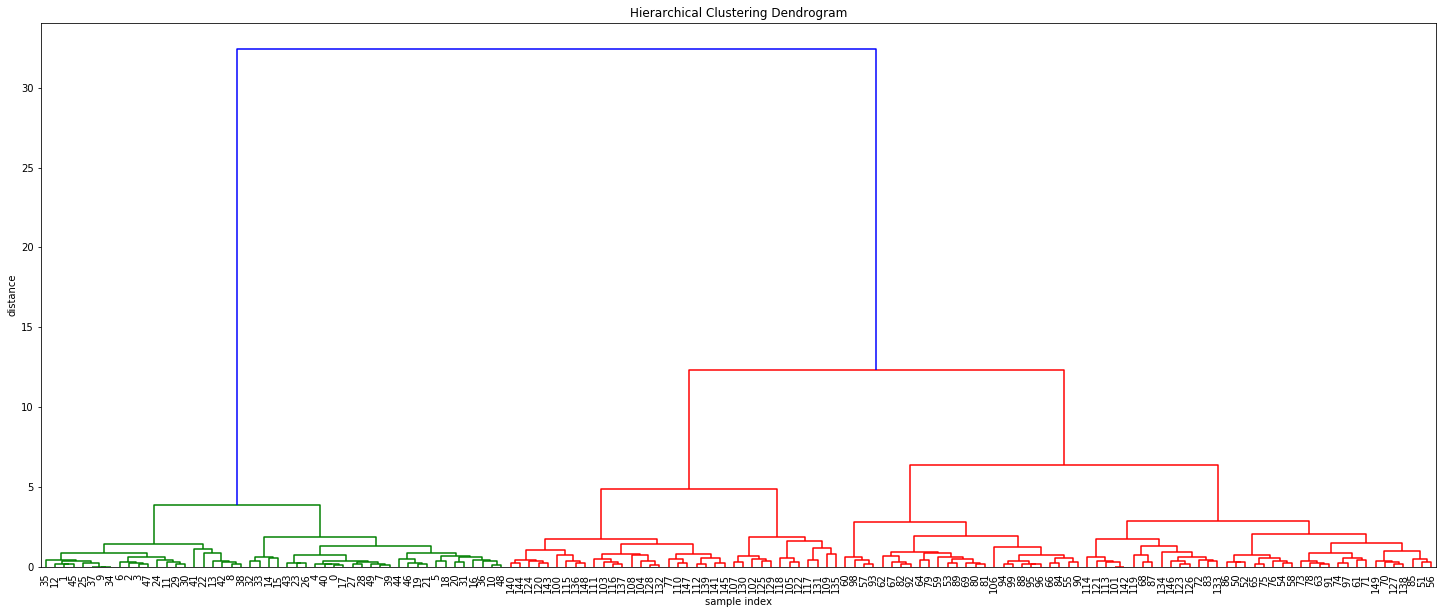

In [14]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10,  # font size for the x axis labels
    
)
plt.show()

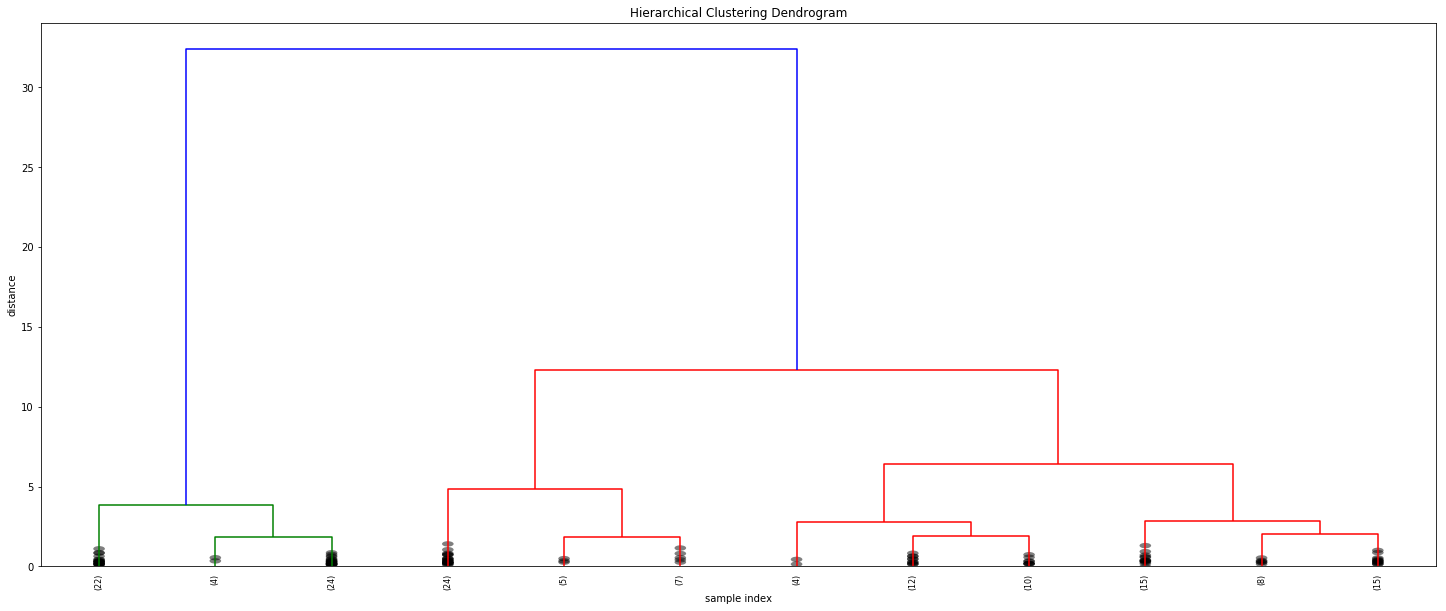

In [15]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted = True
)
plt.show()

Use `fancy_dendrogram` function in [this page](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

In [16]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

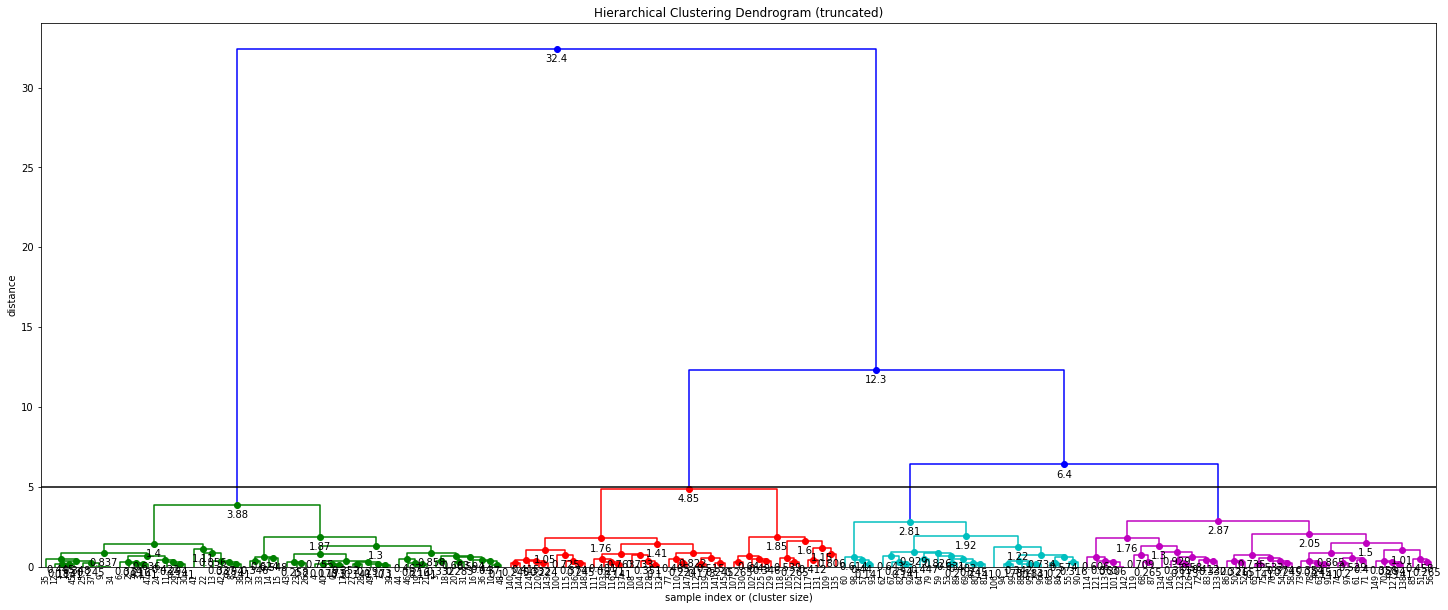

In [18]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    max_d = 5
)
plt.show()